# Benchmarks of Fuzzy Time Series Models

In [23]:
library(repr)
options(warn=-1)
options(repr.plot.width=10, repr.plot.height=5)

source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")

## Load Datasets

      Year       Enrollments   
 Min.   :1971   Min.   :13055  
 1st Qu.:1976   1st Qu.:15200  
 Median :1982   Median :15732  
 Mean   :1982   Mean   :16194  
 3rd Qu.:1987   3rd Qu.:16904  
 Max.   :1992   Max.   :19337  

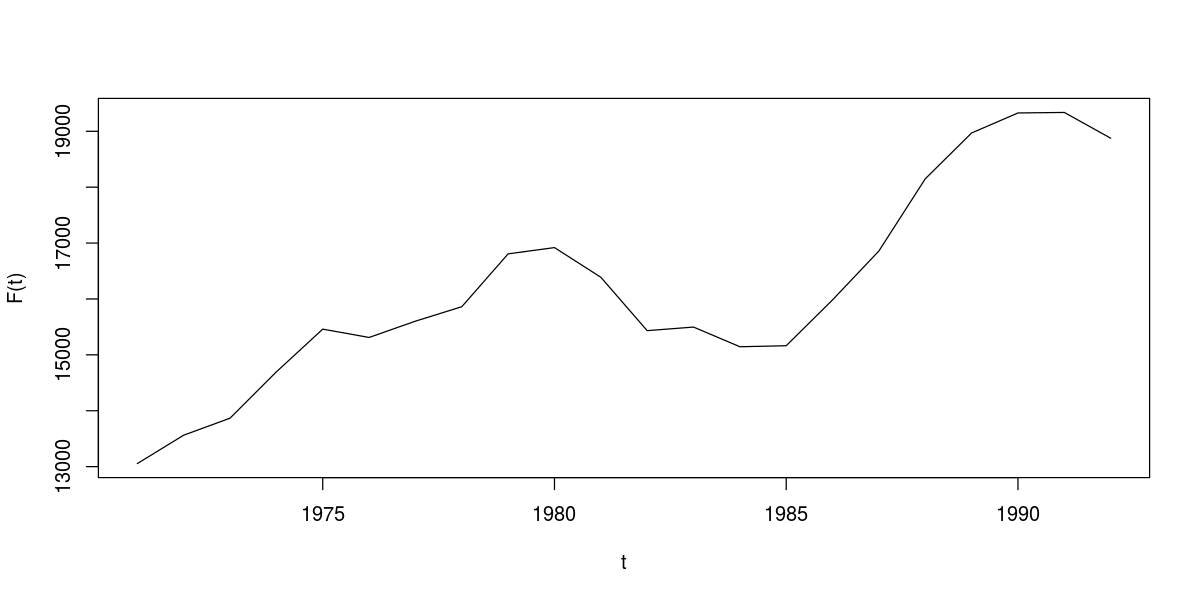

In [17]:
enrollments <- read.csv("/home/petronio/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/DataSets/Enrollments.csv",sep=";")

#denrollments <- data.frame(enrollments$Year, c(NA,D(enrollments$Enrollments,1)))
#names(denrollments) <- c("Year","Enrollments")

summary(enrollments)

options(repr.plot.width=10, repr.plot.height=5)
#par(mfrow=c(2,1))
plot(enrollments,type="l",xlab="t",ylab="F(t)")
#plot(denrollments,type="h")
#abline(h=0)

      Date                 avg       
 Min.   :1995-01-05   Min.   : 3474  
 1st Qu.:1999-12-06   1st Qu.: 5920  
 Median :2005-04-13   Median : 7200  
 Mean   :2005-04-19   Mean   : 7071  
 3rd Qu.:2010-08-06   3rd Qu.: 8234  
 Max.   :2015-12-02   Max.   :10228  

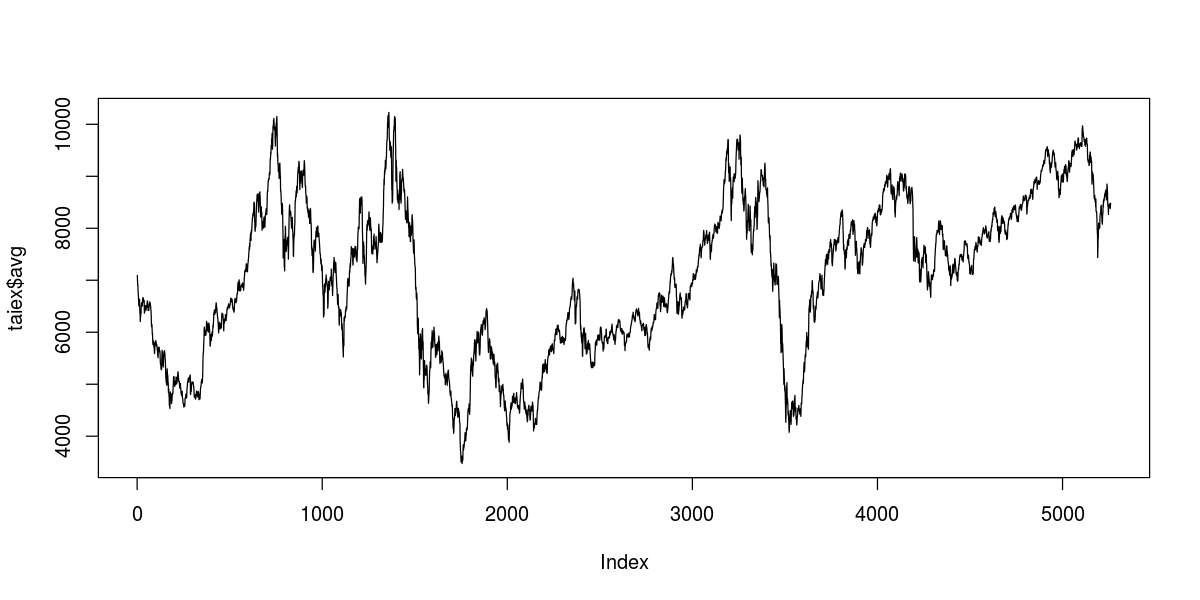

In [70]:
#rm(tmp)
#rm(taiex)
tmp <- read.csv("/home/petronio/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/DataSets/TAIEX.csv",sep=",") #, nrows=2000)

taiex <- tmp[c("Date","avg")]
taiex$Date <- as.Date(taiex$Date)
rownames(taiex) <- 1:nrow(taiex)

#dtaiex <- data.frame(taiex$Date, c(NA,D(taiex$avg,1)))
#names(dtaiex) <- c("Date","avg")

options(repr.plot.width=10, repr.plot.height=5)
#par(mfrow=c(2,1))
plot(taiex$avg,type="l")
#plot(dtaiex,type="h")
#abline(h=0)

summary(taiex)

## Conventional FTS (Chen)

In [61]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")
fit <- FitChenFTS(enrollments$Enrollments,7,trimf,NULL)
fts <- fit$train();
sprintf(fts$dump())

[1] " \n A1 -> A1 \n A2 -> A2, A3 \n A3 -> A4 \n A4 -> A4, A5 \n A5 -> A4, A5, A6 \n A6 -> A7 \n A7 -> A7"

## Weighted FTS (Yu)

In [62]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")
fitw <- FitYuFTS(enrollments$Enrollments,7,trimf,NULL)
wfts <- fitw$train();
sprintf(wfts$dump())

[1] " \n A1 -> 1 * A1 \n A2 -> 0.33 * A2, 0.67 * A3 \n A3 -> 1 * A4 \n A4 -> 0.33 * A4, 0.67 * A5 \n A5 -> 0.17 * A4, 0.33 * A5, 0.5 * A6 \n A6 -> 1 * A7 \n A7 -> 1 * A7"

## IWFTS (Ismail & Efendi)

In [95]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")
fite <- FitEfendiFTS(taiex$avg[2500:4000],25,trimf,NULL)
efts <- fite$train();
sprintf(efts$dump())

[1] "1 \n \n A1 -> 1*A1 \n \n A2 -> 0.5*A2, 0.5*A3 \n \n A3 -> 0.68*A3, 0.26*A4, 0.06*A2 \n \n A4 -> 0.18*A3, 0.73*A4, 0.09*A5 \n \n A5 -> 0.2*A6, 0.53*A5, 0.27*A4 \n \n A6 -> 0.2*A7, 0.5*A6, 0.3*A5 \n \n A7 -> 0.77*A7, 0.15*A6, 0.08*A8 \n \n A8 -> 0.5*A8, 0.39*A9, 0.06*A7, 0.06*A10 \n \n A9 -> 0.81*A9, 0.13*A10, 0.06*A8 \n \n A10 -> 0.85*A10, 0.09*A9, 0.06*A11, 0.01*A8 \n \n A11 -> 0.79*A11, 0.07*A10, 0.14*A12 \n \n A12 -> 0.1*A11, 0.8*A12, 0.1*A13 \n \n A13 -> 0.73*A13, 0.14*A12, 0.14*A14 \n \n A14 -> 0.76*A14, 0.11*A15, 0.12*A13 \n \n A15 -> 0.13*A14, 0.73*A15, 0.14*A16 \n \n A16 -> 0.08*A15, 0.75*A16, 0.17*A17 \n \n A17 -> 0.13*A16, 0.77*A17, 0.1*A18 \n \n A18 -> 0.76*A18, 0.11*A17, 0.12*A19, 0.01*A20, 0.01*A16 \n \n A19 -> 0.68*A19, 0.21*A18, 0.12*A20 \n \n A20 -> 0.6*A20, 0.18*A21, 0.2*A19, 0.02*A22 \n \n A21 -> 0.57*A21, 0.24*A22, 0.02*A19, 0.17*A20 \n \n A22 -> 0.69*A22, 0.22*A21, 0.1*A23 \n \n A23 -> 0.56*A23, 0.17*A24, 0.28*A22 \n \n A24 -> 0.77*A24, 0.18*A25, 0.05*A23 \n \n A25 -> 0.64*A25, 0.18*A23, 0.18*A24"

## EWFTS (Sadaei)

In [64]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")
fits <- FitSadaeiFTS(enrollments$Enrollments,6,trimf,1.2)
sfts <- fits$train();
sprintf(sfts$dump())

[1] " \n \n A1 -> 1*A1 \n \n A2 -> 0.45*A2, 0.55*A3 \n \n A3 -> 0.45*A3, 0.55*A4 \n \n A4 -> 0.27*A4, 0.33*A5, 0.4*A3 \n \n A5 -> 0.45*A4, 0.55*A6 \n \n A6 -> 1*A6"

## IFTS

In [6]:
fiti <- FitIFTS(enrollments$Enrollments,7,trimf,NULL)
ifts <- fiti$train();
sprintf(ifts$dump())
ifts$forecast(15000)
#pfts$fuzzySets

[1] " \n A1 -> A1 \n A2 -> A2, A3 \n A3 -> A4 \n A4 -> A4, A5 \n A5 -> A4, A5, A6 \n A6 -> A7 \n A7 -> A7"

NA,NA
14732.62,17040.30


In [34]:
pfts$fuzzySets$A4$membership(16894)
pfts$fuzzySets$A5$membership(16894)

[1] 0

[1] 0

In [7]:
fitiw <- FitIWFTS(enrollments$Enrollments,8,trimf,NULL)
iwfts <- fitiw$train();
sprintf(iwfts$dump())
iwfts$forecast(5000)

[1] "1 \n \n A1 -> 1*A1 \n \n A2 -> 0.5*A2, 0.5*A3 \n \n A3 -> 0.5*A3, 0.5*A4 \n \n A4 -> 0.714285714285714*A4, 0.285714285714286*A5 \n \n A5 -> 0.666666666666667*A6, 0.333333333333333*A4 \n \n A6 -> 0.333333333333333*A6, 0.333333333333333*A5, 0.333333333333333*A7 \n \n A7 -> 1*A8 \n \n A8 -> 1*A8"

NA,NA
0,0


In [8]:
subset <- taiex$avg[800:1000]

options(repr.plot.width=10, repr.plot.height=5)

plot(subset,type="l",xlab="t",ylab="F(t)")

l <- length(subset)

prevs <- matrix(rep(0,l*2),l,2)

#prevs_p <- pfts$forecast(subset)
prevs_iw <- iwfts$forecast(subset)

#lines(seq(1,l+1),prevs_p[,1],col="red")
lines(seq(1,l+1),prevs_iw[,1],col="green")
#lines(seq(1,l+1),prevs_p[,2],col="red")
lines(seq(1,l+1),prevs_iw[,2],col="green")

#legend("topright",legend=c("PFTS","PWFTS"), fill=c("red","green"))

ERROR: Error in eval(expr, envir, enclos): object 'taiex' not found


ERROR: Error in subset.default(x): argument "subset" is missing, with no default


ERROR: Error in x[k]: object of type 'closure' is not subsettable


ERROR: Error in xy.coords(x, y): object 'prevs_iw' not found


ERROR: Error in xy.coords(x, y): object 'prevs_iw' not found


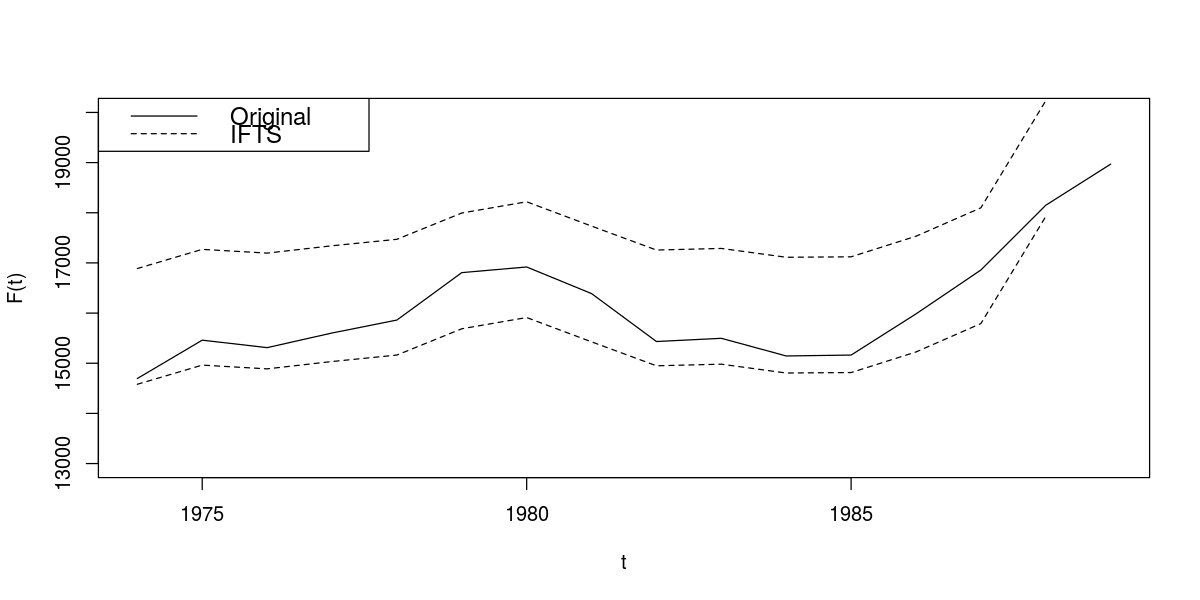

In [13]:
subset <- enrollments$Enrollments[4:19]

options(repr.plot.width=10, repr.plot.height=5)

plot(enrollments$Year[4:19],subset,type="l",xlab="t",ylab="F(t)",ylim=c(13000,20000))

l <- length(subset)

prevs <- matrix(rep(0,l*2),l,2)

prevs_i <- ifts$forecast(subset)
lines(enrollments$Year[4:18],prevs_i[2:l,1],lty=2)
lines(enrollments$Year[4:18],prevs_i[2:l,2],lty=2)

legend("topleft",legend=c("Original","IFTS"), lty=c(1,2),cex=1.2)

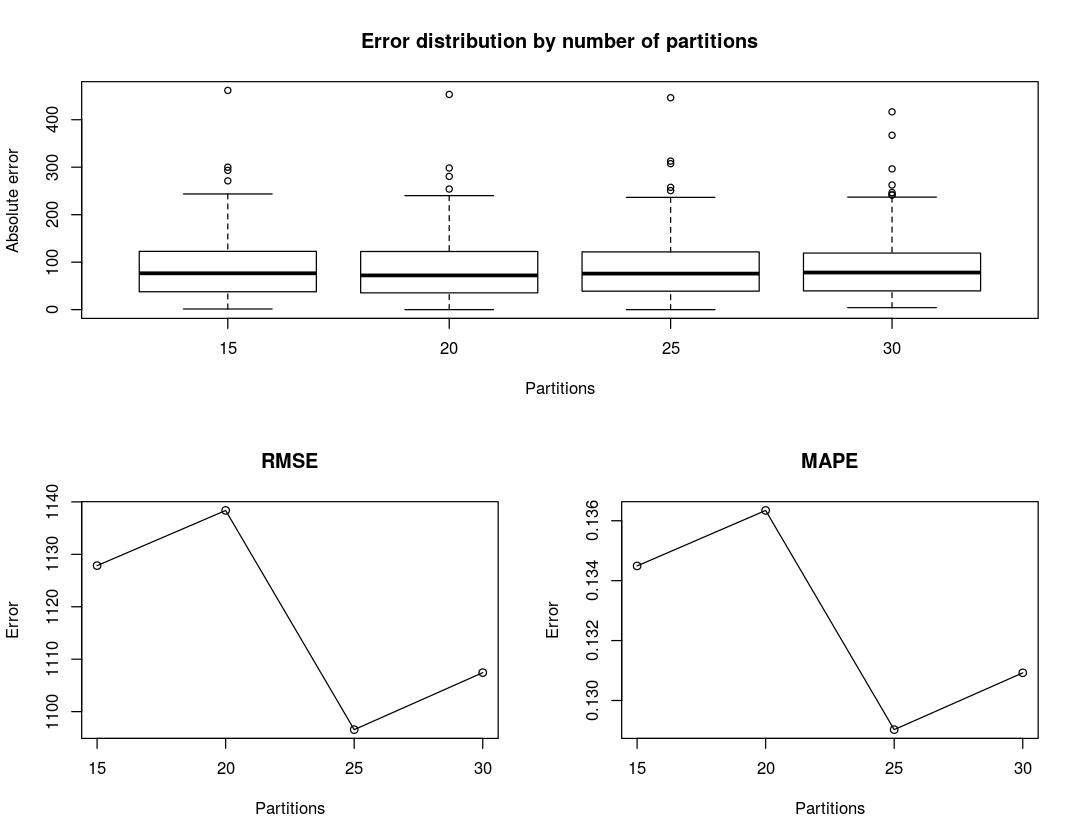

In [83]:
testPartitionsInterval(FitPWFTS, taiex,"Date","avg", c(10,15,20,25,30), 0.8)

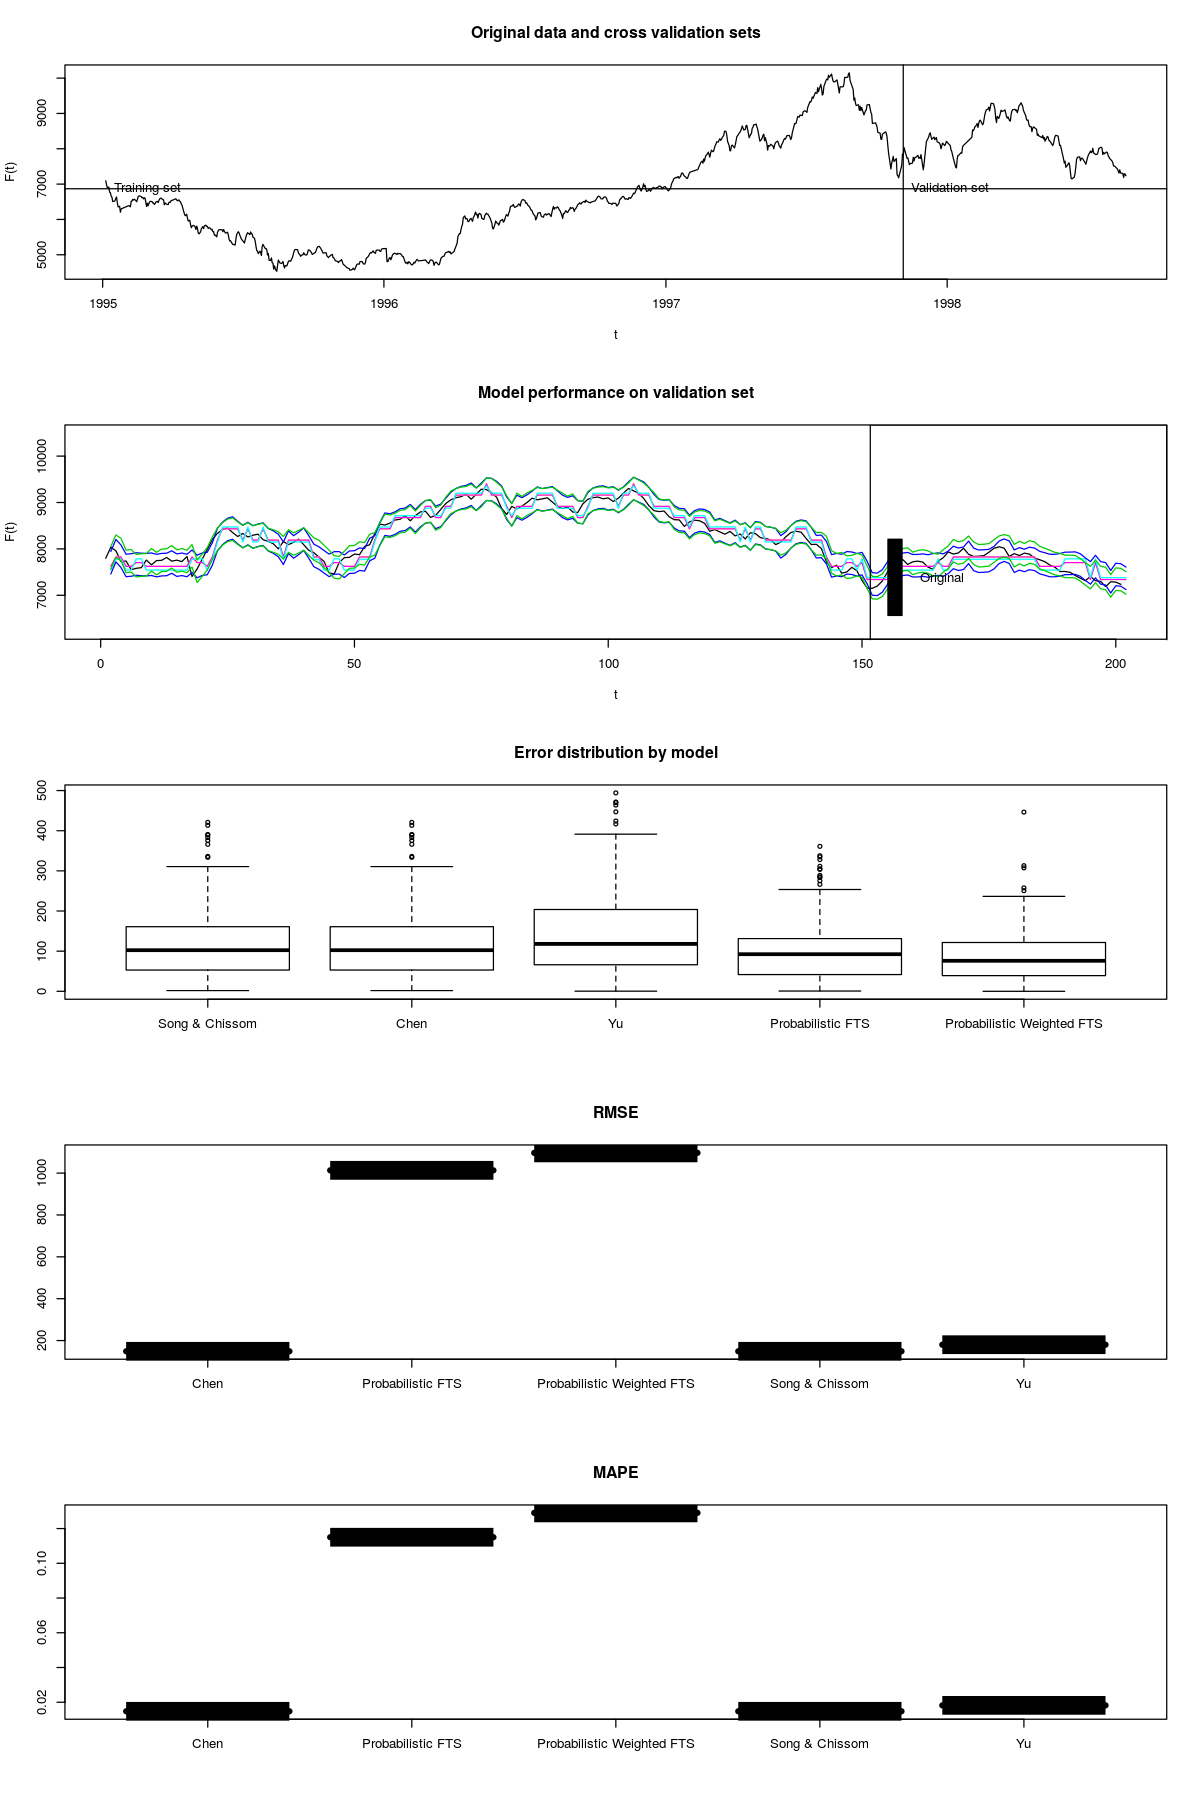

In [127]:
benchmarkAll(taiex,"Date","avg", c(25,25,25,25,25), 0.8)

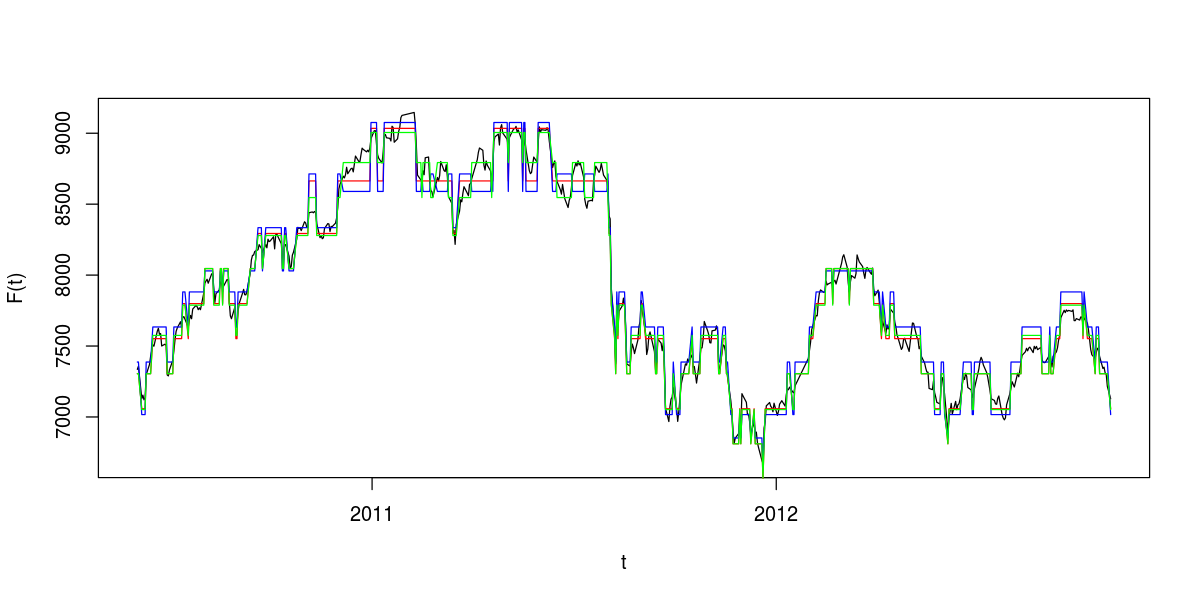

In [114]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")

subset <- taiex$avg[2500:4500]
dates <-taiex$Date[2500:4500]

options(repr.plot.width=10, repr.plot.height=5)

plot(dates[1401:2000],subset[1401:2000],type="l",xlab="t",ylab="F(t)") #,ylim=c(13000,20000))

l <- length(subset)

##### FTS - CHEN

fts <- FitChenFTS(subset[1:1400],25,trimf,NULL)$train();

pred_fts <- fts$forecast(subset[1400:2000])

lines(dates[1401:2000],pred_fts[2:601],col="red")

##### WFTS - YU

wfts <- FitYuFTS(subset[1:1400],25,trimf,NULL)$train();

pred_wfts <- wfts$forecast(subset[1400:2000])

lines(dates[1401:2000],pred_wfts[2:601],col="blue")

##### IWFTS - Ismail & Efendi

iwfts <- FitEfendiFTS(subset[1:1400],25,trimf,NULL)$train();

pred_iwfts <- iwfts$forecast(subset[1400:2000])

lines(dates[1401:2000],pred_iwfts[2:601],col="green")

##### EWFTS - Sadaei

#ewfts <- FitSadaeiFTS(subset[1:1400],25,trimf,NULL)$train();

#pred_ewfts <- ewfts$forecast(subset[1400:2000])

#lines(dates[1401:2000],pred_ewfts[2:601],col="orange")


#l <- length(subset)

#prevs <- matrix(rep(0,l*2),l,2)

#prevs_i <- ifts$forecast(subset)
#lines(enrollments$Year[4:18],prevs_i[2:l,1],lty=2)
#lines(enrollments$Year[4:18],prevs_i[2:l,2],lty=2)

#legend("topleft",legend=c("Original","IFTS"), lty=c(1,2),cex=1.2)